# Computing Historical Returns and Volatility for NFTS

*have to make assumptions for the future and your Brownian motion, those NFT won't have ass much return and volatility in the future as what it is now*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seed = 5       
N  = 2.**8     # increments

def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b


# brownian increments
b = Brownian(seed, N)[1]

# brownian motion
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)  

Text(0.5, 1.0, 'Brownian Increments')

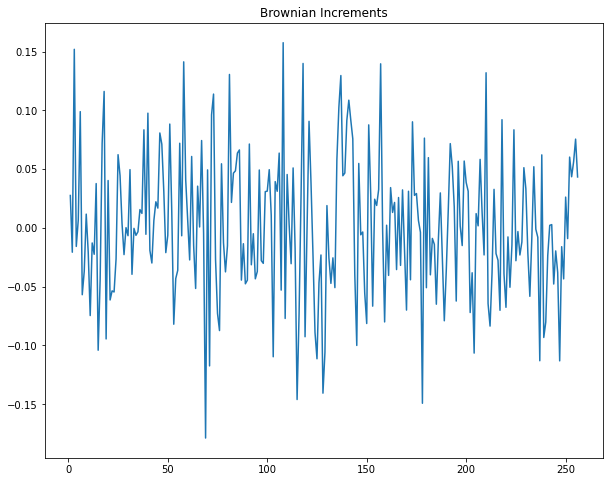

In [2]:
# brownian increments
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
xb = np.linspace(1, len(b), len(b))
plt.plot(xb, b)
plt.title('Brownian Increments')

Text(0.5, 1.0, 'Brownian Motion')

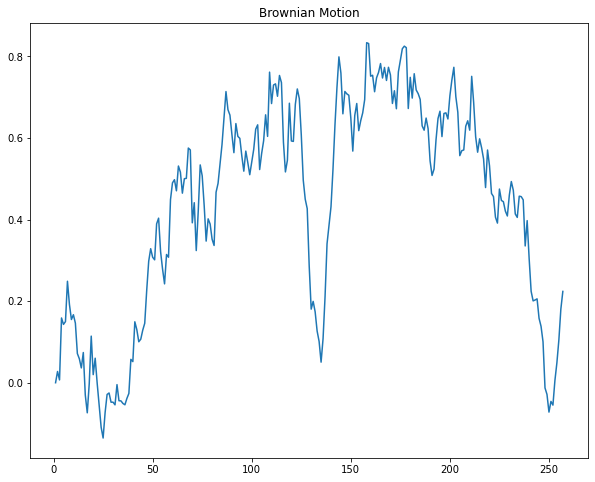

In [3]:
# brownian motion
xw = np.linspace(1, len(W), len(W))
plt.plot(xw, W)
plt.title('Brownian Motion')

Text(0.5, 1.0, 'Geometric Brownian Motion')

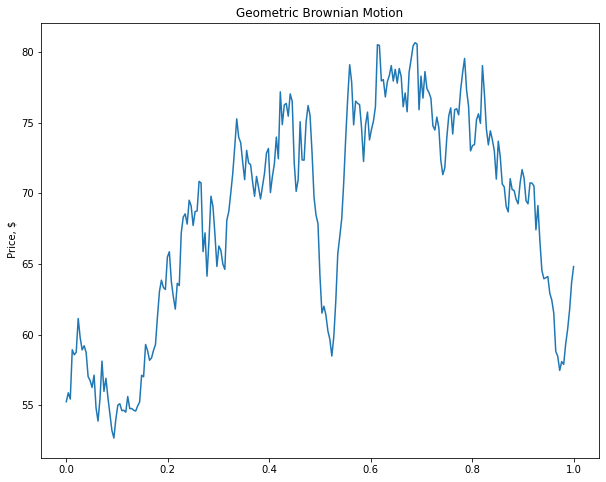

In [4]:
# GBM Exact Solution

# Parameters
#
# So:     initial  price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments
N = int(N)
def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

So = 55.25
mu = 0.15
sigma = 0.4
W = Brownian(seed, N)[0]
T = 1
#N = 2.**6

soln = GBM(So, mu, sigma, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1]       # time increments for  plotting

plt.plot(t, soln)
plt.ylabel(' Price, $')
plt.title('Geometric Brownian Motion')

Text(0.5, 1.0, 'Geometric Brownian Motion')

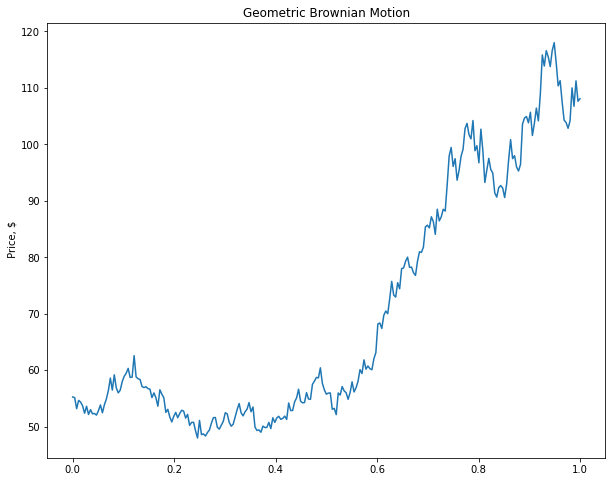

In [5]:
So = 55.25
mu = 0.15
sigma = 0.4
seed = 22
W = Brownian(seed, N)[0]
T = 1.
#N = 2.**6

soln = GBM(So, mu, sigma, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1]       # time increments for  plotting

plt.plot(t, soln)
plt.ylabel(' Price, $')
plt.title('Geometric Brownian Motion')

In [6]:
df = pd.read_csv('CryptoPunks.csv')

print (df.tail())  # taking a look at the first 5 rows

                 DateTime  Sales (USD)
1222  2021-12-11 00:00:00   1966654.24
1223  2021-12-12 00:00:00   2393657.71
1224  2021-12-13 00:00:00   7692628.45
1225  2021-12-14 00:00:00   2499769.36
1226  2021-12-15 00:00:00   2650374.97


In [7]:
df = df[1129:] #from june 2021

In [8]:
df = df.reset_index(drop=True)

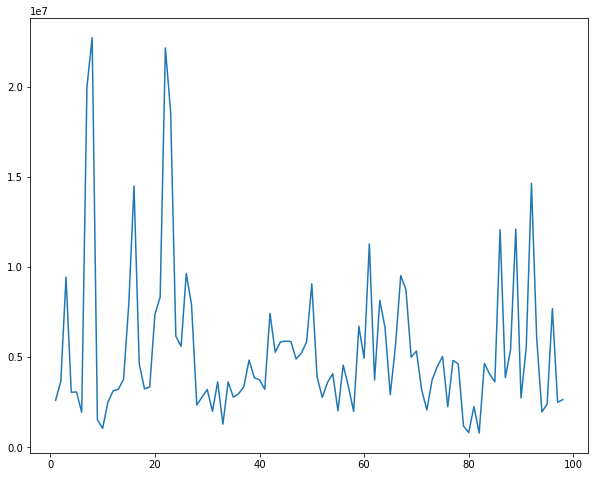

In [9]:
price = df['Sales (USD)']
time = np.linspace(1, len(price), len(price))

plt.plot(time, price)

In [10]:
def daily_return(price):
    returns = []
    for i in range(0, len(price)-1):
        today = price[i+1]
        yesterday = price[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns = daily_return(price)
#252 is number of trading days
mu = np.mean(returns)    # drift coefficient
sig = np.std(returns)  # diffusion coefficient

print (mu, sig)

0.33871607495119266 1.2803210043740978


Since we have a simple case, a closed form solution exists
S(t)=S0 * exp[(μ−(σ^2)/2)t+σWt]


In [11]:
sig

1.2803210043740978

Text(0.5, 1.0, 'Geometric Brownian Motion - ')

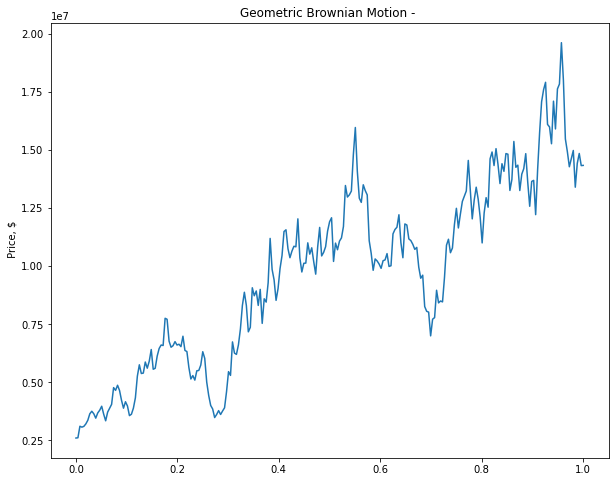

In [12]:
# GBM Exact Solution

# Parameters
#
# So:     initial  price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,int(N+1))
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

seed = 18
So = price[0]            # Initial price (06/01/2021)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**8    # Discretization by 2^8 or 256

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln)
plt.ylabel(' Price, $')
plt.title('Geometric Brownian Motion - ')

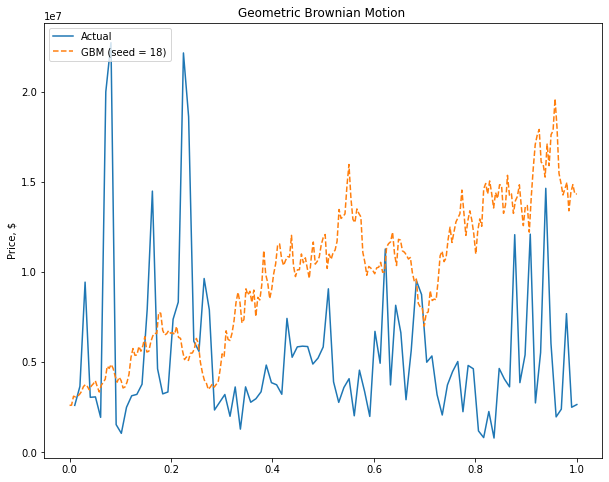

In [13]:
# adjusting the original time array from days to years
time = np.linspace(1, len(price), len(price))
time = [i/len(price) for i in time]

plt.plot(time, price, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 18)', ls='--')

plt.ylabel('Price, $')
plt.title('Geometric Brownian Motion ')

plt.legend(loc = 'upper left')

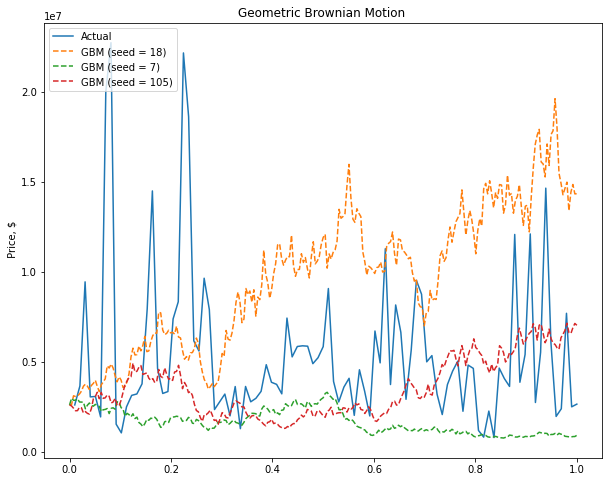

In [14]:
T = 1.
#N = 2.**6
So = price[0]

seed = 7
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 105
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sig, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(price), len(price))
time = [i/len(price) for i in time]

plt.plot(time, price, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 18)', ls = '--')
plt.plot(t, soln2, label = 'GBM (seed = 7)', ls = '--')
plt.plot(t, soln3, label = 'GBM (seed = 105)', ls = '--')

plt.ylabel(' Price, $')
plt.title('Geometric Brownian Motion ')

plt.legend(loc = 'upper left')

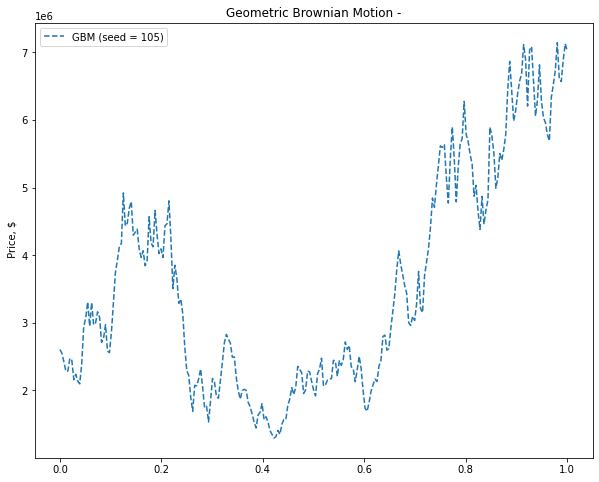

In [15]:
#N = 2.**6
So = price[0]

seed = 105
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

plt.plot(t, soln3, label = 'GBM (seed = 105)', ls = '--')

plt.ylabel(' Price, $')
plt.title('Geometric Brownian Motion -')

plt.legend(loc = 'upper left')

*A comparison between closed form solution and Euler-Maruyama Approximation*

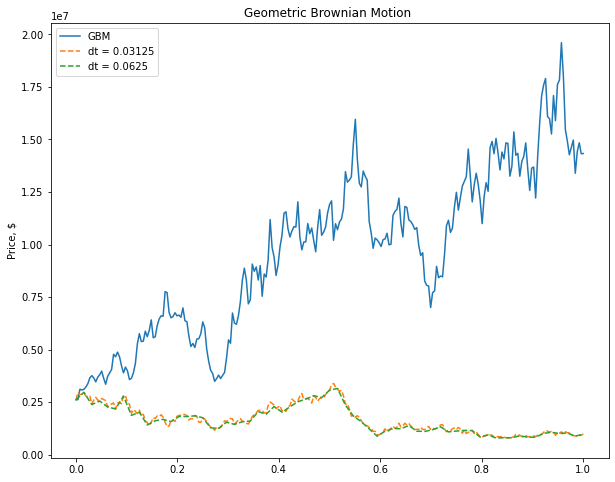

In [16]:
# Exact solution - GBM Model
seed = 18
So = price[0]            # Initial price from june 2021
W = Brownian(seed, N)[0]
T = 1.
#N = 2.**6

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln, label ='GBM')


# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(7, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,int(L+1))

# dt = 0.0625
b = Brownian(7, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,int(L+1))


plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('Price, $')
plt.title('Geometric Brownian Motion ')

plt.legend(loc = 'upper left')